In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

In [4]:
print(train_df.shape,test_df.shape)

(891, 12) (418, 11)


In [5]:
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
243,244,0,3,"Maenpaa, Mr. Matti Alexanteri",male,22.0,0,0,STON/O 2. 3101275,7.1250,NaN,S
203,204,0,3,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.2250,NaN,C
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
133,134,1,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.0000,NaN,S
294,295,0,3,"Mineff, Mr. Ivan",male,24.0,0,0,349233,7.8958,NaN,S


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

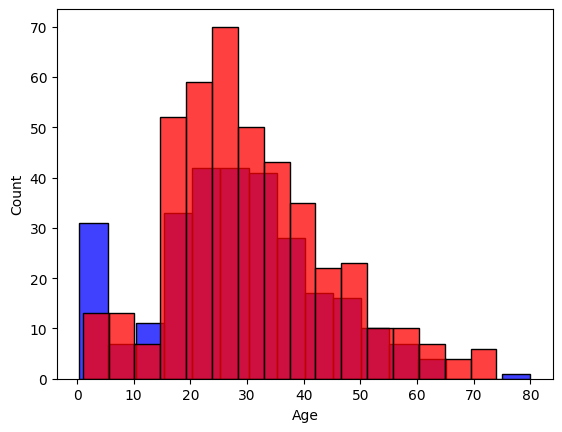

In [8]:
sns.histplot(train_df.Age[train_df.Survived==1],color='b')
sns.histplot(train_df.Age[train_df.Survived==0],color = 'r')


In [80]:
train_df['Age'] = train_df['Age'].fillna(np.around(train_df['Age'].mean()))


In [81]:
data = [train_df,test_df]
for df in data:
    df["Family"]= df.SibSp+df.Parch
    df.drop(['SibSp','Parch'],axis=1,inplace=True)

In [57]:
#more people have survived who have a cabin
print(f"Have cabin {train_df[train_df["Cabin"].isnull()^1].Survived.mean()} Don't have {train_df[train_df["Cabin"].isnull()].Survived.mean()}")

Have cabin 0.6666666666666666 Don't have 0.29985443959243085


In [82]:
data = [train_df,test_df]
for df in data:
    df['Cabin'] =  np.where(df['Cabin'].isnull(),0,1)

<Figure size 640x480 with 0 Axes>

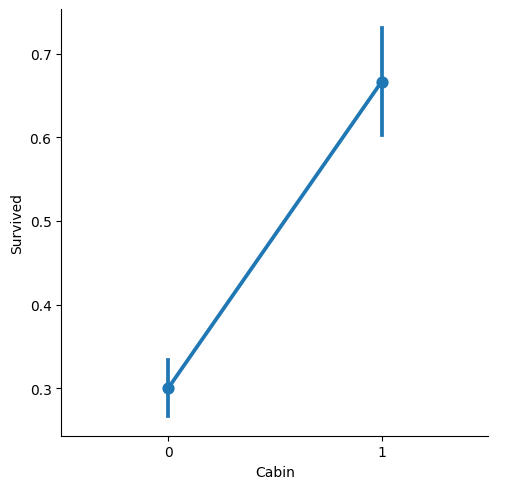

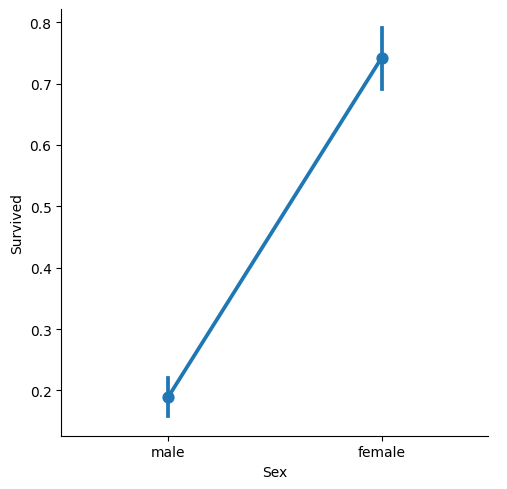

In [13]:
for i, col in enumerate(['Cabin', 'Sex']):
  plt.figure(i)
  sns.catplot(x=col, y='Survived', data=train_df, kind='point',)

In [83]:
data = [train_df,test_df]
for df in data:
    df['Sex'] = df['Sex'].map({'male': 0,'female':1})

In [85]:
data = [train_df,test_df]
for df in data:
    df.drop(['PassengerId','Name','Ticket','Embarked'],axis=1,inplace=True)

In [86]:
X= train_df.drop(['Survived'],axis=1)
Y= train_df.Survived

In [87]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
print(X_test.shape, X_train.shape)

(179, 6) (712, 6)


In [20]:
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV


In [95]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

classifiers = [RandomForestClassifier, DecisionTreeClassifier, SVC, LogisticRegression, KNeighborsClassifier, GaussianNB, XGBClassifier]
classifiers_names = ['RandomForestClassifier', 'DecisionTreeClassifier', 'SVC', 'LogisticRegression', 'KNeighborsClassifier', 'GaussianNB', 'XGBClassifier']

classifiers_scores = []

for classifier, name in zip(classifiers, classifiers_names):
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    model = classifier() 
    cv_score = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    classifiers_scores.append(cv_score.mean())

classifiers_df = pd.DataFrame({'Classifier': classifiers_names, 'Score': classifiers_scores})
classifiers_df

,Classifier,Score
0,RandomForestClassifier,0.823758
1,DecisionTreeClassifier,0.787865
2,SVC,0.674519
3,LogisticRegression,0.803508
4,KNeighborsClassifier,0.704806
5,GaussianNB,0.775481
6,XGBClassifier,0.821573


In [31]:
cross_val_score(RandomForestClassifier(),X,Y,cv=5)

array([0.75977654, 0.81460674, 0.85393258, 0.79213483, 0.84831461])

In [35]:
param_grid = {'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]}

rfc = RandomForestClassifier()
est = GridSearchCV(estimator = rfc, param_grid = param_grid, scoring ='accuracy', cv = 5,verbose=0)
est.fit(X_train,y_train)
print(est.best_score_)
print(est.best_params_)

0.8300403821530582
{'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 400}


In [46]:
print(f"Train score {est.score(X_train,y_train)} \n Test score {est.score(X_test,y_test)}")


Train score 0.9101123595505618 
 Test score 0.8324022346368715


In [94]:
from sklearn.metrics import precision_score, recall_score, f1_score
y_pred = est.predict(X_test)

print(f'Model     RandomForest')
print(f'Accuraacy {accuracy_score(y_test, y_pred)}')
print(f'Precision {precision_score(y_test, y_pred)}')
print(f'Recall    {recall_score(y_test, y_pred)}')
print(f'F1 Score  {f1_score(y_test, y_pred)}')





Model     RandomForest
Accuraacy 0.8324022346368715
Precision 0.84375
Recall    0.7297297297297297
F1 Score  0.782608695652174
